In [ ]:
# Predicting and Analysing Programming language based on intial Prompt

In [24]:
import pandas as pd
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from gensim import corpora, models
from sklearn.model_selection import train_test_split

In [27]:
file_path = "C:/Users/SmritiNair/Desktop/Dataset.xlsx"
num_columns_to_read = len(pd.read_excel(file_path, nrows=1).columns)
df = pd.read_excel(file_path, usecols=range(num_columns_to_read))


# cleaning data
df['cleaned_text'] = df['Initial Prompt'].replace(r'\n', '', regex=True) #html cleaning
df['cleaned_text'] = df['Initial Prompt'].replace(r'<[^>]+>', '', regex=True) #html cleaning
df['cleaned_text'] = df['cleaned_text'].replace(r'http\S+', '', regex=True)
df['cleaned_text'] = df['cleaned_text'].replace(r'[^A-Za-z0-9\s]', '', regex=True)
df['cleaned_text'] = df['cleaned_text'].str.lower()

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def process_text(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 1]
    return " ".join(tokens)

df['cleaned_text'] = df['cleaned_text'].apply(process_text)

# Display the first few rows of the processed data
df.head()

,Initial Prompt,Yes/No (Resolved or not),NumberOfPrompts,L/H (Low or High),Programming Language,which type of technology (DL/ML/WEB/None),cleaned_text
0,How to add a java class in a generic container...,Yes,3.0,L,Java,NaN,add java class generic container testcontainer...
1,How to run a java class inside of a container ...,Yes,2.0,L,Java,NaN,run java class inside container testcontainers
2,"I have a github repo on python, how to make it...",Yes,1.0,L,Python,NaN,github repo python make installable pip instal...
3,I'm using Terraform to manage some infrastruct...,Yes,2.0,L,HCL,NaN,im using terraform manage infrastructure gcp u...
4,I have a challenge for you. I'm working in a r...,No,8.0,H,TypeScript,WEB,challenge im working reacttypescript applicati...


The most repeated word is 'using' with a count of 157.


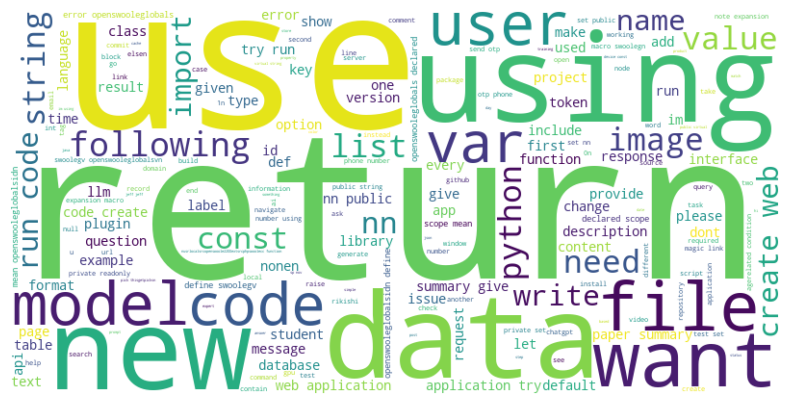

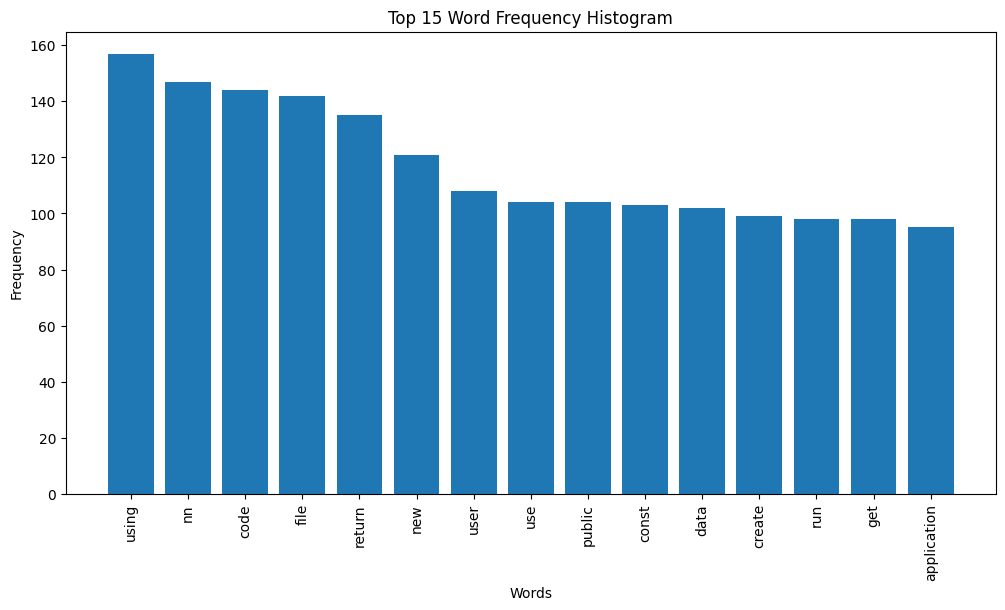

In [28]:
#data analysis (finding most repeated word in data)
def find_most_repeated_word(text):
    words = text.split()
    word_counts = Counter(words)
    most_repeated_word, count = word_counts.most_common(1)[0]
    return most_repeated_word, count

def generate_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

def generate_histogram(text, top_n=15):
    words = text.split()
    word_counts = Counter(words)
    top_words, top_counts = zip(*word_counts.most_common(top_n))
    plt.figure(figsize=(12, 6))
    plt.bar(top_words, top_counts)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f'Top {top_n} Word Frequency Histogram')
    plt.xticks(rotation=90)
    plt.show()


input_text = " ".join(df['cleaned_text'])

most_repeated_word, count = find_most_repeated_word(input_text)
print(f"The most repeated word is '{most_repeated_word}' with a count of {count}.")

generate_word_cloud(input_text)
generate_histogram(input_text)

In [29]:
#vectorizing text data
def calculate_tf_idf(corpus):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
    return tfidf_matrix.toarray()

In [30]:
vectors=calculate_tf_idf(df['cleaned_text'])


In [31]:
#data balancing by using SMOTE
from imblearn.over_sampling import SMOTE
over = SMOTE(sampling_strategy=0.8,random_state=42)
#x_data_sampled,y_data_sampled=over.fit_resample(vectors,df['Yes/No (Resolved or not)'])

In [32]:
mytags = list(set(df['Programming Language']))

In [33]:
import numpy as np
df['Programming Language'] = df['Programming Language'].replace(np.nan, 'theory')
df['Programming Language'] = df['Programming Language'].replace('None     ', 'theory')
df['Programming Language'].replace('None', 'other', inplace=True)

In [34]:
mytags= ['thoery' if type(x) == float else x for x in mytags]
mytags

['TypeScript',
 'Objective-C',
 'Java',
 'C sharp',
 'Yaml',
 'Ruby',
 'PHP',
 'csharp',
 'Json',
 'Haxe',
 'Sql',
 'Xml',
 'Hcl',
 'HCL',
 'C',
 'kotlin',
 'Arduino',
 'Tsx',
 'Shell',
 'yaml',
 'Csharp',
 'C++',
 'Networks',
 'Jinja',
 'Html',
 'Javascript',
 'Rust',
 'Elixir',
 'Linux',
 'json',
 'Socket',
 'Typescript',
 'Gradle',
 'Bash',
 'arduino',
 'Docker',
 'Css',
 'PLpgSQL',
 'Php',
 'SQL',
 'Kotlin',
 'None     ',
 'Regex',
 'Python',
 'Jsx',
 'Swift',
 'hcl',
 'thoery',
 'XML']

<Axes: xlabel='Programming Language'>

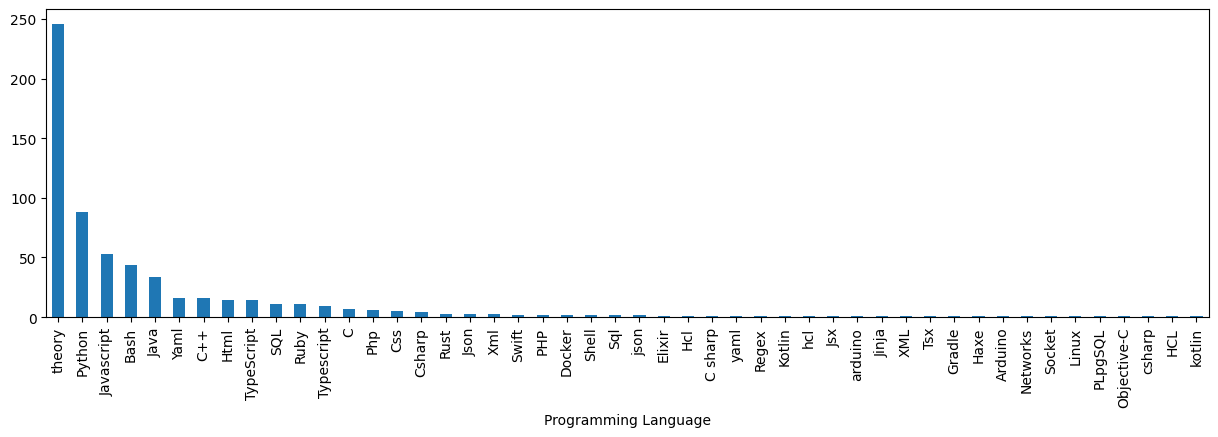

In [35]:
#ploting most repeated programing language
plt.figure(figsize=(15,4))
df['Programming Language'].value_counts().plot(kind='bar')

In [36]:
df['Programming Language'].value_counts()

Programming Language
theory         246
Python          88
Javascript      53
Bash            44
Java            34
Yaml            16
C++             16
Html            14
TypeScript      14
SQL             11
Ruby            11
Typescript       9
C                7
Php              6
Css              5
Csharp           4
Rust             3
Json             3
Xml              3
Swift            2
PHP              2
Docker           2
Shell            2
Sql              2
json             2
Elixir           1
Hcl              1
C sharp          1
yaml             1
Regex            1
Kotlin           1
hcl              1
Jsx              1
arduino          1
Jinja            1
XML              1
Tsx              1
Gradle           1
Haxe             1
Arduino          1
Networks         1
Socket           1
Linux            1
PLpgSQL          1
Objective-C      1
csharp           1
HCL              1
kotlin           1
Name: count, dtype: int64

In [37]:
len(df['Programming Language'].value_counts())
mytags = list(set(df['Programming Language']))

In [38]:
#spliting data to train and test
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['Programming Language'], test_size=0.3, random_state = 42)

In [39]:
#Implementing the ML Model(Logistic regresion)
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from sklearn.metrics import classification_report
from bs4 import BeautifulSoup
%matplotlib inline

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)


y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
#print(classification_report(y_test, y_pred,labels=np.arange(0,len(mytags),1),target_names=mytags,zero_division=0))

accuracy 0.4385026737967914


In [40]:
#Implementing sgd classifier
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
#print(classification_report(y_test, y_pred,labels=np.arange(0,len(mytags),1),target_names=mytags,zero_division=0))

accuracy 0.6096256684491979


In [41]:
threshold=5
res = df.groupby('Programming Language').filter(lambda x : len(x)>10)

In [42]:
res

,Initial Prompt,Yes/No (Resolved or not),NumberOfPrompts,L/H (Low or High),Programming Language,which type of technology (DL/ML/WEB/None),cleaned_text
0,How to add a java class in a generic container...,Yes,3.0,L,Java,NaN,add java class generic container testcontainer...
1,How to run a java class inside of a container ...,Yes,2.0,L,Java,NaN,run java class inside container testcontainers
2,"I have a github repo on python, how to make it...",Yes,1.0,L,Python,NaN,github repo python make installable pip instal...
4,I have a challenge for you. I'm working in a r...,No,8.0,H,TypeScript,WEB,challenge im working reacttypescript applicati...
5,I need help using chatgpt api to create a rapp...,Yes,3.0,L,TypeScript,WEB,need help using chatgpt api create rapper comp...
...,...,...,...,...,...,...,...
617,Which of the following gates gives 1 as the ou...,Yes,2.0,L,theory,NaN,following gate give output input onlyn nandn x...
618,This code is used to make a scaler that can ta...,Yes,1.0,L,Python,NaN,code used make scaler take value known data ra...
619,If I want to compile a library written in C as...,Yes,7.0,H,Bash,NaN,want compile library written shared object bin...
620,Here's a regular expression from PEP 263: ^[ \...,Yes,3.0,L,Bash,NaN,here regular expression pep 263 tfcoding tazaz...


In [43]:
#Data Sampling using SMOTE
vectors_ml=calculate_tf_idf(res['cleaned_text'])
from imblearn.over_sampling import SMOTE
over = SMOTE(random_state=42)
x_data_sampled_ml,y_data_sampled_ml=over.fit_resample(vectors_ml,res['Programming Language'])

In [44]:
#After Data sampling applying logisticRegression
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(x_data_sampled_ml, y_data_sampled_ml, test_size=0.2, random_state=42)

logreg = Pipeline([
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
#print(classification_report(y_test, y_pred,labels=np.arange(0,len(mytags),1),target_names=mytags,zero_division=0))

accuracy 0.9520295202952029


In [45]:
#After Data sampling applying SGDClassifier
from sklearn.linear_model import SGDClassifier
X_train, X_test, y_train, y_test = train_test_split(x_data_sampled_ml, y_data_sampled_ml, test_size=0.2, random_state=42)
sgd = Pipeline([
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
#print(classification_report(y_test, y_pred,labels=np.arange(0,len(mytags),1),target_names=mytags))

accuracy 0.9501845018450185
